**Kelompok 2 :**
1. Aliffio Syah M - 41519120065
2. Khairul Sholech - 41519120068
3. Reza Arrofi - 41519120044
4. Nurhasanah Nasution - 41518110231
5. Syaiful Alim - 41519120021
6. Fauzan Ardiansyah - 41519120028
7. Chris Moulana B - 41517110052

Link Youtube yang kami ambil untuk metode K-Means sebagai berikut :
https://www.youtube.com/watch?v=phWWIHu4wSM

Nama Channel : Danar Pamungkas

Judul Video : Cara kerja dan Implementasi K-Means Clustering menggunakan Python | Machine Learning | Data Mining

**Read Dataset**

Pertama kita menggunakan dataset nilaimahasiswa.csv yang bisa kalian download melalui link berikut : https://drive.google.com/file/d/1qe2vayeVOgtdn4DP6-QgNDxXkD7Jt28F/view


In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Import library yang dibutuhkan
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#impor dataset yang akan kita gunakan
dfmhs = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/nilaimahasiswa.csv',sep=';',engine='python')

In [4]:
#Fungsi describe() digunakan untuk menampilkan statistik deskriptif dari data frame atau series.
dfmhs.describe()

,uts,uas
count,50.000000,50.000000
mean,56.220000,60.960000
std,27.316953,25.235996
min,12.000000,0.000000
25%,30.250000,45.000000
50%,55.000000,56.000000
75%,71.500000,81.000000
max,100.000000,100.000000


In [5]:
#info() digunakan untuk menampilkan informasi detail tentang dataframe
dfmhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Text(0.5, 1.0, 'Grafik Nilai Mahasiswa')

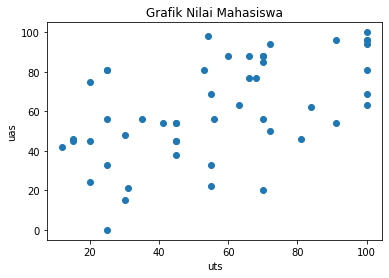

In [6]:
# Kita coba Visualisasikan data
plt.scatter(dfmhs['uts'], dfmhs['uas'])
plt.xlabel("uts")
plt.ylabel("uas")
plt.title("Grafik Nilai Mahasiswa")


**Membuat Data Training**

In [7]:
#membuat data training uts dan uas
x_train = dfmhs[['uts','uas']].values

In [8]:
#menampilkan data training
x_train

array([[ 15,  46],
       [ 66,  77],
       [ 25,  33],
       [ 53,  81],
       [ 20,  75],
       [100,  94],
       [ 55,  69],
       [ 25,  56],
       [ 25,  81],
       [ 30,  48],
       [ 15,  45],
       [ 81,  46],
       [ 68,  77],
       [ 72,  50],
       [ 56,  56],
       [ 63,  63],
       [100,  69],
       [ 35,  56],
       [ 55,  33],
       [ 31,  21],
       [ 55,  22],
       [ 70,  85],
       [ 30,  15],
       [ 25,  81],
       [ 12,  42],
       [ 20,  24],
       [ 72,  94],
       [ 25,   0],
       [ 91,  54],
       [ 60,  88],
       [ 45,  54],
       [ 70,  56],
       [100,  63],
       [ 45,  45],
       [ 45,  54],
       [ 70,  88],
       [ 45,  45],
       [ 70,  20],
       [100,  81],
       [100,  96],
       [100, 100],
       [ 45,  38],
       [ 66,  88],
       [100,  96],
       [ 54,  98],
       [ 20,  45],
       [ 91,  96],
       [ 41,  54],
       [ 70,  88],
       [ 84,  62]])

**Feature Scaling**

In [9]:
#memanggil library MinMax Scaler
from sklearn.preprocessing import MinMaxScaler 
#mendefinisikan variabel scaler sebagai variabel proses dari MinMaxScaler
scaler = MinMaxScaler() 
#proses mengonversi X_train menjadi X_train yang sudah di rescale
x_train = scaler.fit_transform(x_train) 

In [10]:
#menampilkan data x_train yang sudah di scale
x_train

array([[0.03409091, 0.46      ],
       [0.61363636, 0.77      ],
       [0.14772727, 0.33      ],
       [0.46590909, 0.81      ],
       [0.09090909, 0.75      ],
       [1.        , 0.94      ],
       [0.48863636, 0.69      ],
       [0.14772727, 0.56      ],
       [0.14772727, 0.81      ],
       [0.20454545, 0.48      ],
       [0.03409091, 0.45      ],
       [0.78409091, 0.46      ],
       [0.63636364, 0.77      ],
       [0.68181818, 0.5       ],
       [0.5       , 0.56      ],
       [0.57954545, 0.63      ],
       [1.        , 0.69      ],
       [0.26136364, 0.56      ],
       [0.48863636, 0.33      ],
       [0.21590909, 0.21      ],
       [0.48863636, 0.22      ],
       [0.65909091, 0.85      ],
       [0.20454545, 0.15      ],
       [0.14772727, 0.81      ],
       [0.        , 0.42      ],
       [0.09090909, 0.24      ],
       [0.68181818, 0.94      ],
       [0.14772727, 0.        ],
       [0.89772727, 0.54      ],
       [0.54545455, 0.88      ],
       [0.

**Clustering**

In [11]:
#import library K-Means
from sklearn.cluster import KMeans
#Membuat metode KMeans dengan n_cluster = 2
kmean = KMeans(n_clusters=2)
kmean

KMeans(n_clusters=2)

In [12]:
#fungsi .fit_predict() dan X_train untuk melatih KMeans tersebut dengan training dataset.
y_cluster = kmean.fit_predict(x_train)

In [13]:
#Menampilkan y_cluser
y_cluster

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0], dtype=int32)

In [14]:
#Membuat atribut baru yaitu Cluster dengan data yang ada di y_cluster
dfmhs['Cluster'] = y_cluster

In [15]:
#Menampilkan data dengan tambahan Cluster
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,1
1,ARFENDO,66,77,0
2,LATIFUDIN,25,33,1
3,HENDI,53,81,0
4,M. FERYAN,20,75,1
5,RENDI,100,94,0
6,NUREKA,55,69,0
7,INDRA,25,56,1
8,MOCH IDWAL,25,81,1
9,REYNO YUSUF,30,48,1


In [16]:
#Untuk mencari nilai tengah
kmean.cluster_centers_

array([[0.75272727, 0.7836    ],
       [0.25227273, 0.4356    ]])

**Visualisasi Data Hasil Clustering**

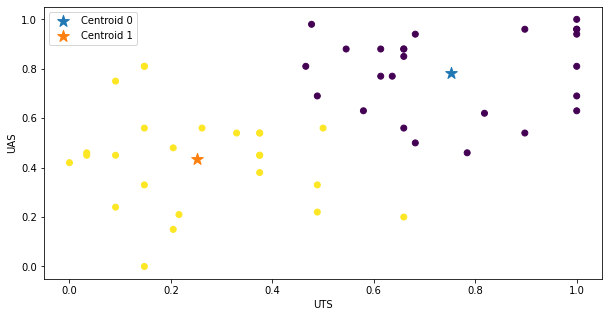

In [17]:
#Untuk menampilkan data dari hasil clustering diatas
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='Centroid 1')
#plt.scatter(kmean.cluster_centers_[2,0], kmean.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='Centroid 2')
plt.xlabel('UTS')
plt.ylabel('UAS')
plt.legend()

Dari plot di atas terlihat 2 buah cluster data yang dapat di interpretasikan sebagai berikut :


Cendroid 0 : Nilai mahasiswa yang baik.

Centroid 1 : Nilai mahasiswa yang kurang.

**Mencari K (jumlah cluster) Terbaik**

In [18]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
inertias = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters=k).fit(x_train)
  inertias.append(km.inertia_)

In [19]:
#Menampilkan interia dari 10 data looping
inertias

[7.842257805785126,
 3.197773404958678,
 2.4267319466388484,
 1.7602211519669226,
 1.2956928807556083,
 0.9647108338252657,
 0.7927034026138003,
 0.5708673229043684,
 0.43037305194805203]

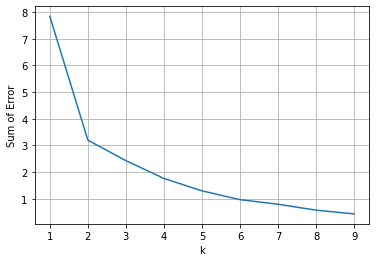

In [20]:
#Menampilkan metode Elbow
plt.xlabel('k')
plt.ylabel('Sum of Error')
plt.plot(k_range, inertias)
plt.grid()

Berdasarkan grafik diatas, dapat dilihat pada titik 2 terjadi lengkungan yang cukup tajam. Sehingga dapat di ambil kesimpulan bahwa K=2 merupakan nilai yang optimal.

**Membuat Dataset Baru dengan Label Cluster**

In [21]:
#Label ulang untuk 0 dan 1 menjadi Baik dan Kurang
dfmhs['Cluster'] = dfmhs['Cluster'].replace([0,1],['Baik','Kurang'])

In [22]:
#Menampilkan hasil akhir
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,Kurang
1,ARFENDO,66,77,Baik
2,LATIFUDIN,25,33,Kurang
3,HENDI,53,81,Baik
4,M. FERYAN,20,75,Kurang
5,RENDI,100,94,Baik
6,NUREKA,55,69,Baik
7,INDRA,25,56,Kurang
8,MOCH IDWAL,25,81,Kurang
9,REYNO YUSUF,30,48,Kurang


Sekian dan Terimakasih